In [1]:
# Coronavirus Aid Relief and Economic Security Act or the CARES Act
# Text Analytics with udpipe in R

In [2]:
# The Coronavirus Aid, Relief, and Economic Security Act (CARES) authorized direct payments to individuals, generous monthly rebates to families with children, and extended unemployment benefits for laid-off workers. 
# It was in effect from March 13, 2020, through Dec.

In [4]:
#Loading required packages for basic Summary:

library(dplyr)
library(ggplot2)
library(stringr)

In [5]:
#Read data into R

manual <- read.csv("D:/Text Analytics_Coronavirus stimulus/cbill.csv", header = T, stringsAsFactors = F)



In [6]:
# udpipe 

library(udpipe)
model <- udpipe_download_model(language = "english")
udmodel_english <- udpipe_load_model(file = 'english-ewt-ud-2.4-190531.udpipe')

Visit https://github.com/jwijffels/udpipe.models.ud.2.4 for model license details


In [7]:
#Annotate Input Text Data 

s <- udpipe_annotate(udmodel_english, manual$text)

x <- data.frame(s)


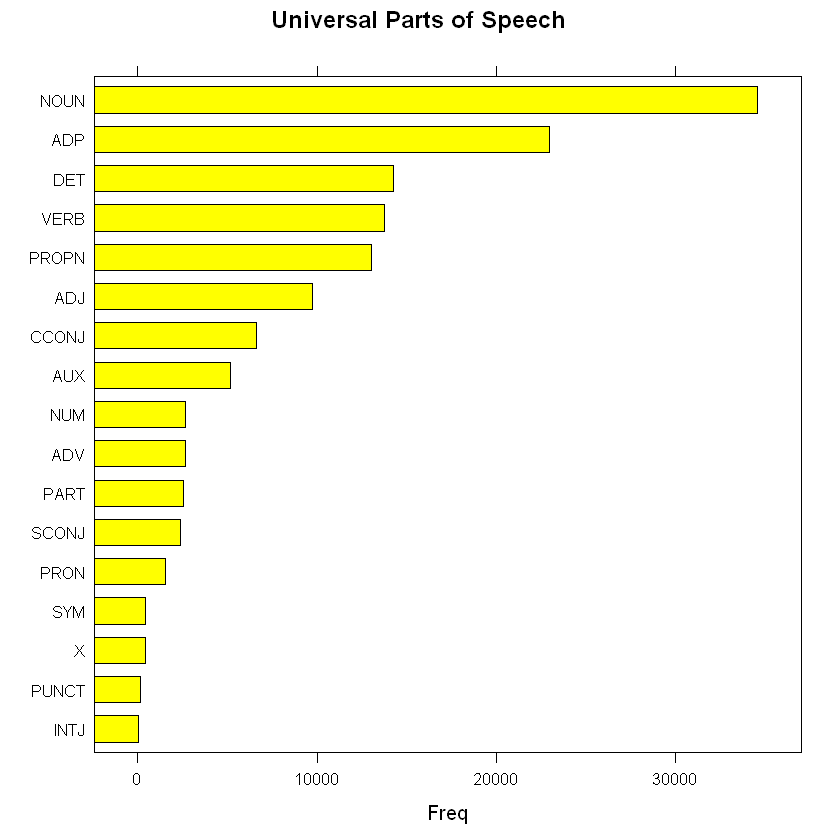

In [8]:
#Universal part-of-speech tags from the given text

library(lattice)
stats <- txt_freq(x$upos)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = stats, col = "yellow", 
         main = "Universal Parts of Speech", xlab = "Freq"
)

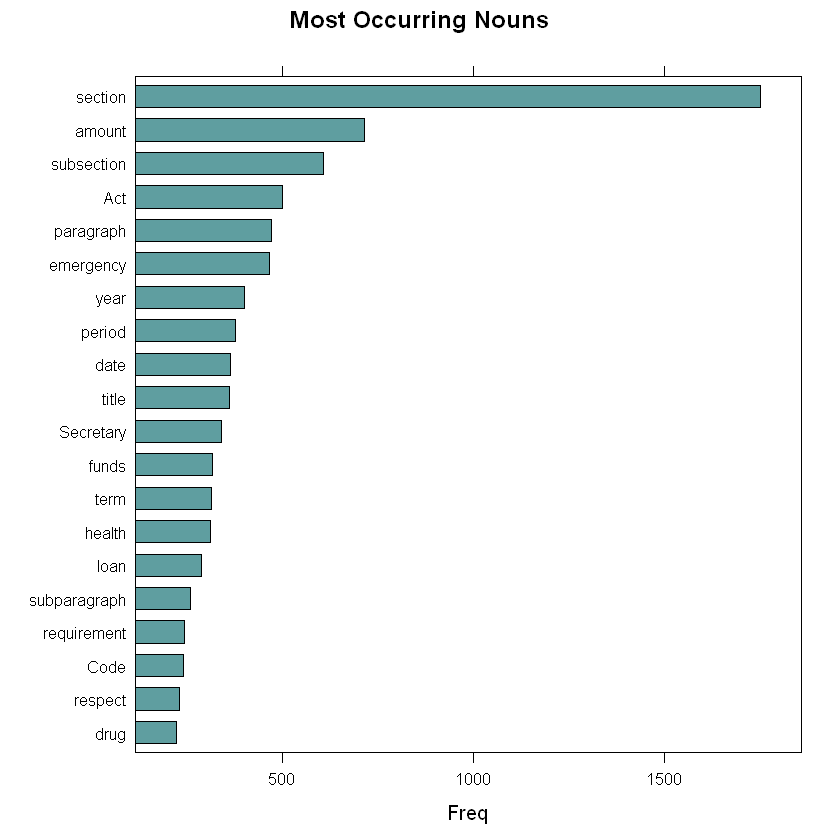

In [9]:
# Most Occurring Nouns

stats <- subset(x, upos %in% c("NOUN"))
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "cadetblue",
         main = "Most Occurring Nouns", xlab = "Freq")



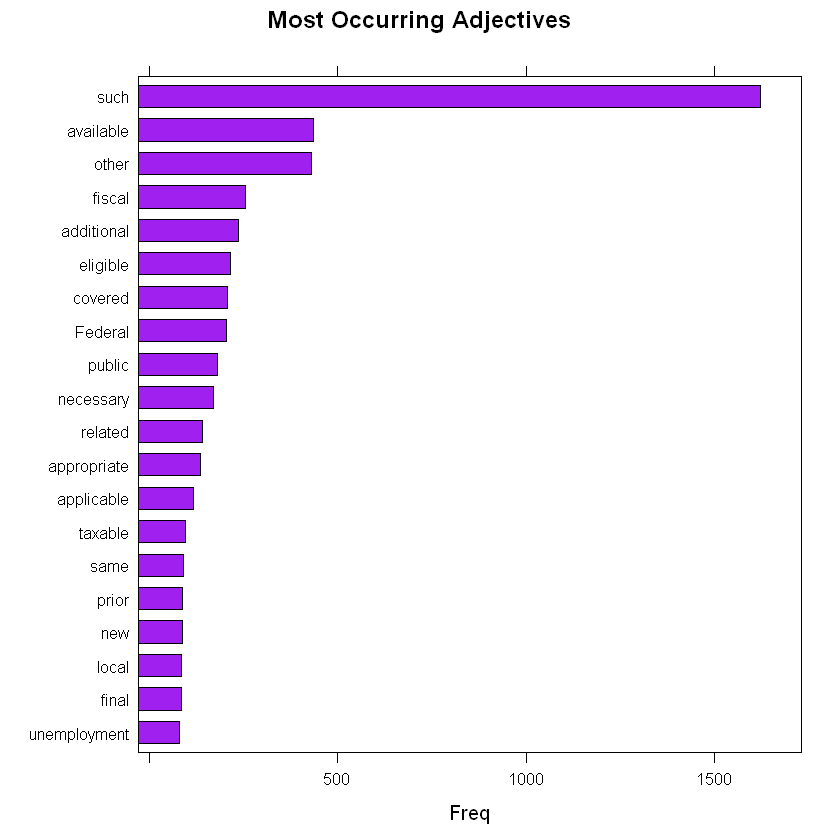

In [10]:
# Most Occurring Adjectives
stats <- subset(x, upos %in% c("ADJ"))
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "purple",
         main = "Most Occurring Adjectives", xlab = "Freq")     


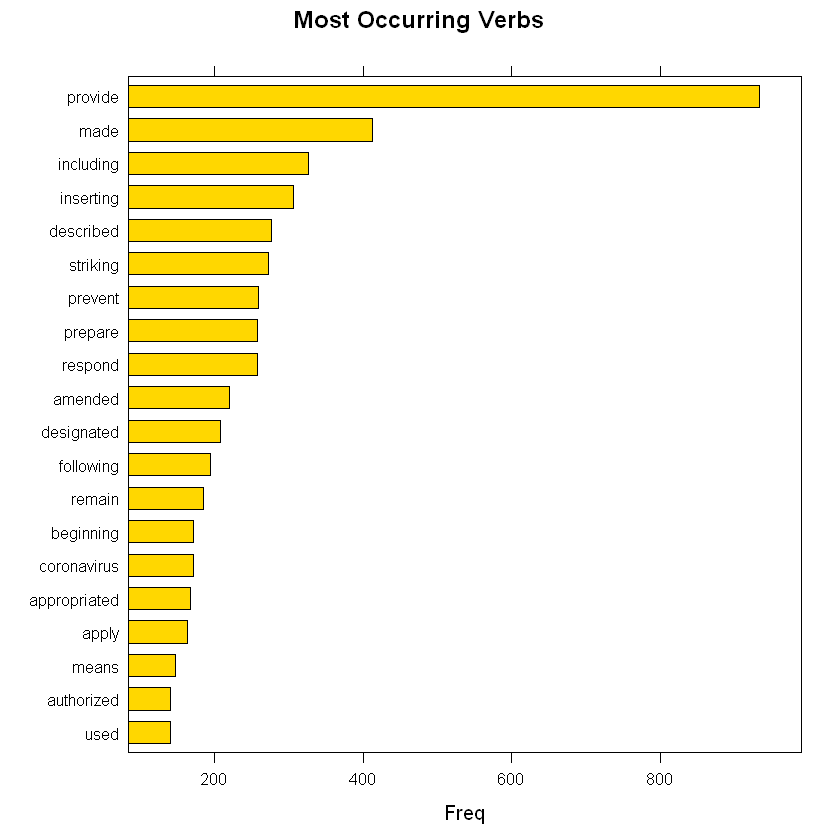

In [11]:
# Verbs
stats <- subset(x, upos %in% c("VERB"))
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "gold",
         main = "Most Occurring Verbs", xlab = "Freq")


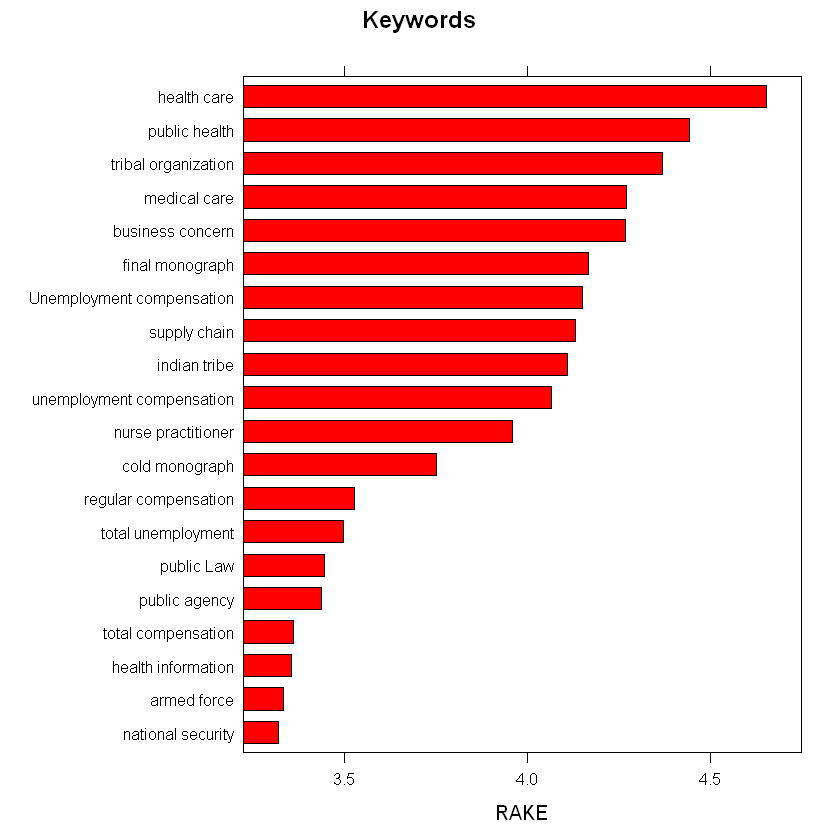

In [12]:
# Using RAKE - Keywords Extraction 

stats<- keywords_rake(x = x, term = "lemma", group = "doc_id",
                      relevant = x$upos %in% c("NOUN", "ADJ"))

stats$key <- factor(stats$keyword, levels = rev(stats$keyword))
barchart(key ~ rake, data = head(subset(stats, freq > 3), 20), col = "red",
         main = "Keywords",
         xlab = "RAKE")


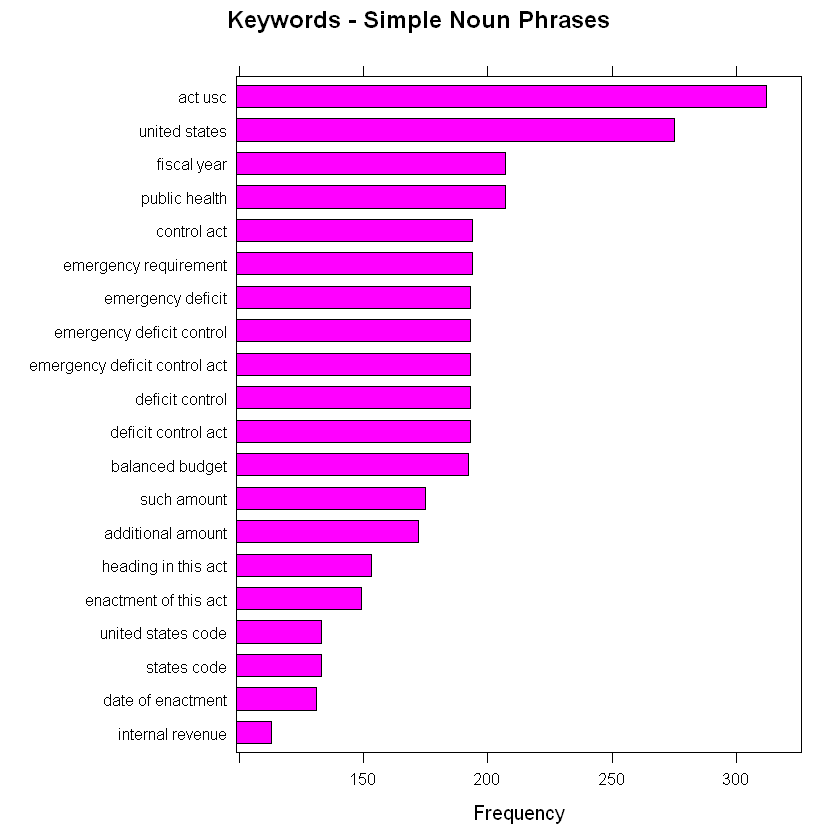

In [13]:
# Top Noun-Verb Pairs as Keyword Pairs / Using a sequence of POS tags (noun/phrases / verb phrases)
x$phrase_tag <- as_phrasemachine(x$upos, type = "upos")
stats <- keywords_phrases(x = x$phrase_tag, term = tolower(x$token),
                          pattern = "(A|N)*N(P+D*(A|N)*N)*",
                          is_regex = TRUE, detailed = FALSE)

stats <- subset(stats, ngram > 1 & freq > 3)
stats$key <- factor(stats$keyword, levels = rev(stats$keyword))
barchart(key ~ freq, data = head(stats, 20), col = "magenta",
         main = "Keywords - Simple Noun Phrases", xlab = "Frequency")                          

stats <- merge(x, x, 
               by.x = c("doc_id", "paragraph_id", "sentence_id", "head_token_id"),
               by.y = c("doc_id", "paragraph_id", "sentence_id", "token_id"),
               all.x = TRUE, all.y = FALSE, 
               suffixes = c("", "_parent"), sort = FALSE)


Loading required package: RColorBrewer


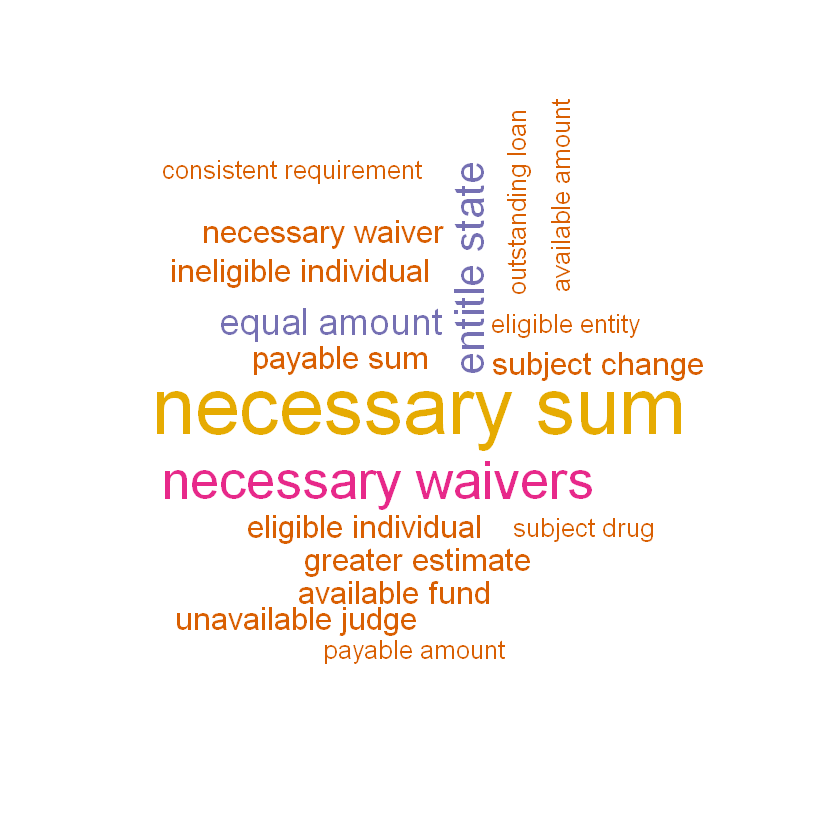

In [14]:
#Word Cloud 
stats <- subset(stats, dep_rel %in% "nsubj" & upos %in% c("NOUN") & upos_parent %in% c("ADJ"))
stats$term <- paste(stats$lemma_parent, stats$lemma, sep = " ")
stats <- txt_freq(stats$term)
library(wordcloud)
wordcloud(words = stats$key, freq = stats$freq, min.freq = 3, max.words = 100,
          random.order = FALSE, colors = c("#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02"))


